# Unperturbed eigenstates and initialisation of constants

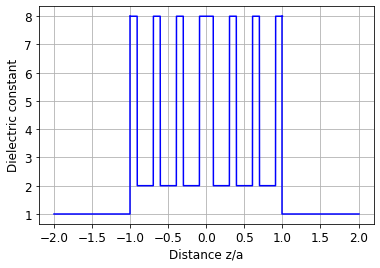

2


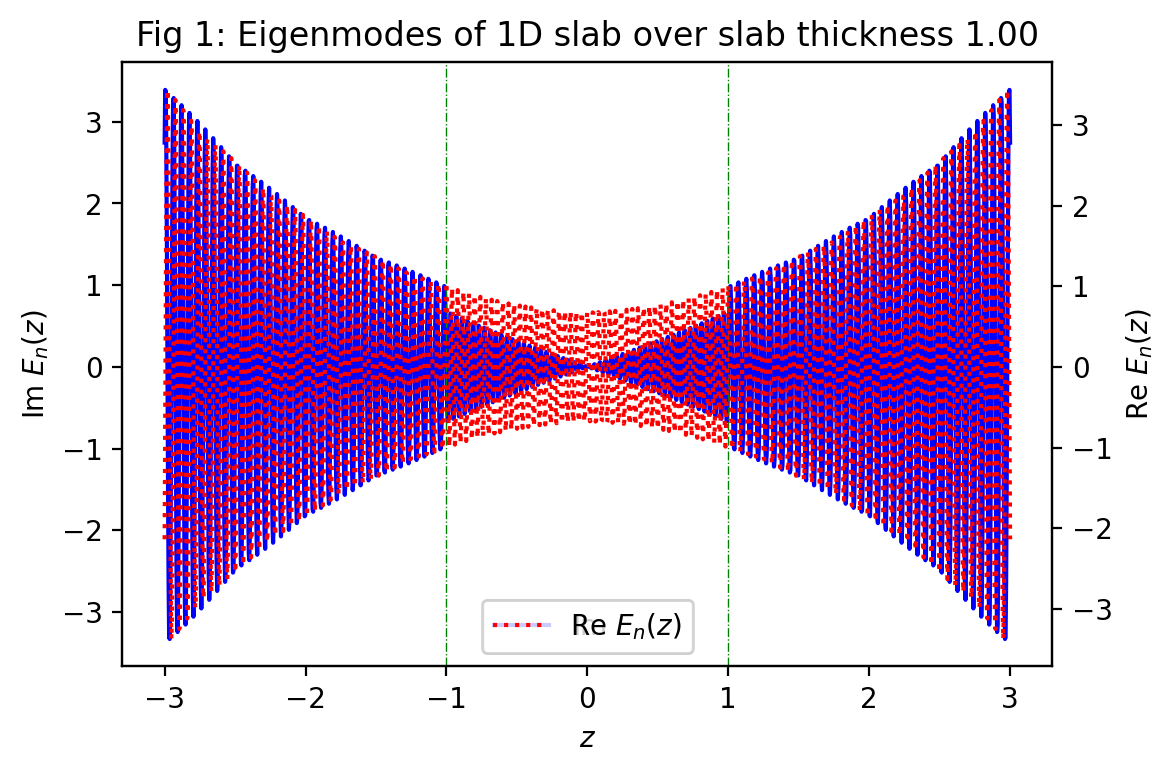

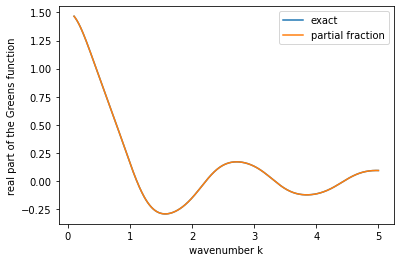

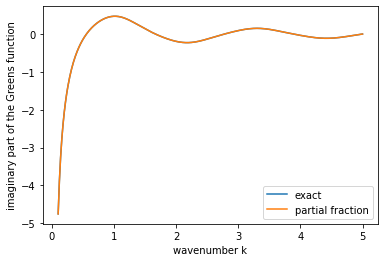

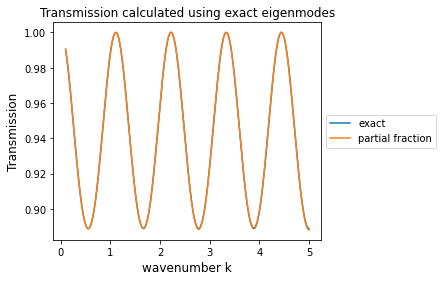

In [20]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import scipy
import scipy.integrate as integrate
import pandas as pd

def delta(n,m):           #dirac delta function
  if n == m:
    return(1)
  else:
    return(0)

def test_func(x,c):
  return cmath.exp(c*x)

def complex_quadrature_test(func, start, end, c):                          #function to test complex integration
    def real_func(x, c):                                                   #gets the real part of the return of the given function
        return np.real(func(x, c)) 
    def imag_func(x, c):                                                   #gets the imaginary part of the return of the given function
        return np.imag(func(x, c))
    real_integral = quad(real_func , start, end, args=(c))                 #integrates the real part of the given function
    imag_integral = quad(imag_func, start, end, args =(c))                 #integrates the imaginary part of the given function
    return (real_integral[0] + 1j*imag_integral[0])   

def alpha_func(ep):                        #relation between the dielecric constant and alpha (below eq.4 in Muljarov 2010)
    return (np.sqrt(ep)+1)/(np.sqrt(ep)-1)

def wavnum_k(a,n,ep):                      #function to calculate the wavenumber (eq.4 in Muljarov 2010)
    return 1/(2*a*np.sqrt(ep)) *(np.pi * n -1j* np.log(alpha_func(ep)))
    
def A_greens_func(a,q,alpha,z_r,z_l):    #analytical form of the Green's Function (eq.8 in Muljarov 2010)
    i_q = complex(0,q)
    z_s = min(z_r, z_l)                  #gets the smaller z value
    z_b = max(z_r, z_l)                  #gets the larger z value
    exp_num_1 = cmath.exp(i_q*(a-z_b))   #determining each term in the equation separately
    exp_num_2 = cmath.exp(-i_q*(a-z_b))
    exp_num_3 = cmath.exp(i_q*(a+z_s))
    exp_num_4 = cmath.exp(-i_q*(a+z_s))
    exp_denom_1 = cmath.exp(i_q*a)
    exp_denom_2 = cmath.exp(-i_q*a)
    term1 = (exp_num_1 + alpha*exp_num_2)/(exp_denom_1 + alpha*exp_denom_2)
    term2 = (exp_num_3 + alpha*exp_num_4)/(-exp_denom_1 + alpha*exp_denom_2)
    return(1/(2*i_q)*term1*term2)

def PF_greens_func(a,z,z_p,k,n, ep):              #function to determine the partial fractions version of the Green's Function (eq.9 in Muljarov 2010)
    pf_sum = 0
    for i in range(2*n + 1):
      k_n  = wavnum_k(a,-n+i,ep)                             #gets the wavenumber, which is dependend on n
      eig1 = en_z_c(z,Bn_func(-n+i,a,ep),-n+i,ep,a)          #gets the n dependend eigenmodes 
      eig2 = en_z_c(z_p,Bn_func(-n+i,a,ep),-n+i,ep,a)
      pf_sum += (eig1*eig2)/(2*k*(k-k_n))  
    return(pf_sum)   

#eigenvalue equation for eigenmodes on the left of the slab    
def en_z_l(z,An,n, ep,a):
    return (-1)**(n)*An*cmath.exp(-1j*wavnum_k(a,n,ep)*z)

#eigenvalue equation for eigenmodes in the slab    
def en_z_c(z,Bn,n,ep,a):
    return Bn * (cmath.exp(1j*np.sqrt(ep)*wavnum_k(a,n,ep)*z) + (-1)**(n)*cmath.exp(-1j*np.sqrt(ep)*wavnum_k(a,n,ep)*z))

#eigenvalue equation for eigenmodes on the right of the slab    
def en_z_r(z,An,n,ep,a):
    return An*cmath.exp(1j*wavnum_k(a,n,ep)*z)

# A coefficient
def An_func(n,a,ep):
    return cmath.exp(-1j*wavnum_k(a,n,ep)*a)/np.sqrt(a*(ep-1))

# B coefficient
def Bn_func(n,a,ep):
    return ((-1j)**n)/(2*np.sqrt(a*ep))
     
def weighted_mean(ep_list, thickness):
  tot = sum(thickness)
  average = 0
  for i in range(len(ep_list)):
    average += ep_list[i]*thickness[i]/tot
  return average
#establishing constants needed in the functions above
ep = 2                        #dielectric constant of unperturbed slab
ep_vac = 1                    #dielectric constant of vacuum
oo = 3                        #origin offset
n = 100                       
a = 1                         #halfwidth of slab
j = complex(0,1)
pert = 10                     #dielectric constant of pertrbation minus ep
pos_of_per = 0.5              #position of perturbation
N = 500                       #Number of points for k, z

#For more-complex multilayer structures:

ep_list = [8, 2, 8, 2, 8, 2, 8, 8, 2, 8, 2, 8, 2, 8]         #, 8, 2, 8, 2, 8, 2, 8, 2, 8, 2, 8                             #defines the list of dielectric constants
thickness = [150, 350, 150, 350, 150, 350, 150, 150, 350, 150, 350, 150, 350, 150]     #, 150, 350, 150, 350, 300, 350, 150, 350, 150, 350, 150       #gives the thickness of each, it will be later be given in units of half width of the slab a

pert_list = []
for i in range(len(ep_list)):
  for j in range(thickness[i]):
    pert_list.append(ep_list[i])

x_lhs = [-2*a, -a, -a]
d_lhs = [1,1,pert_list[0]]
x_rhs = [a,a, 2*a]
d_rhs = [pert_list[-1], 1, 1]
x_pert = np.linspace(-a,a,len(pert_list))
plt.plot(x_lhs,d_lhs, 'b')
plt.plot(x_rhs,d_rhs, 'b')
plt.plot(x_pert,pert_list, 'b')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel('Distance z/a', fontsize = 'large')
plt.ylabel('Dielectric constant', fontsize = 'large')
plt.grid()
plt.show()

ep = 2                          #needed to check if the new method works
#ep = np.mean(pert_list)           #gets the average value of the dielectric constant in the system

#ep = weighted_mean(ep_list, thickness)

print(ep)

pert_list = [z-ep for z in pert_list]

ep = 2                           #needed to check if the new method worked

#"""
#establishing arrays to iterate over imposing thickness limit
z_l = np.linspace(-oo*a,-a,N)
z_c = np.linspace(-a,a,N)
z_r = np.linspace(a,oo*a,N)

#establishing array for eigenmodes 
En_l = np.zeros((2,len(z_l)))
En_c = np.zeros((2,len(z_c)))
En_r = np.zeros((2,len(z_r)))

#iterating over eigenmode arrays and calculating eigenfunctions
for i in range(len(z_l)): 
    En_l[0,i] = en_z_l(z_l[i],An_func(n,a,ep),n, ep,a).imag
    En_l[1,i] = en_z_l(z_l[i],An_func(n,a,ep),n, ep,a).real
    
for i in range(len(z_c)):
    En_c[0,i] = en_z_c(z_c[i],Bn_func(n,a,ep),n,ep,a).imag
    En_c[1,i] = en_z_c(z_c[i],Bn_func(n,a,ep),n,ep,a).real
    
for i in range(len(z_r)):
    En_r[0,i] = en_z_r(z_r[i],An_func(n,a,ep),n,ep,a).imag
    En_r[1,i] = en_z_r(z_r[i],An_func(n,a,ep),n,ep,a).real

#"""
#plotting
figg = 1
fig0,ax0 = plt.subplots(dpi=200,num=1)
ax0.set_title("Fig %d: Eigenmodes of 1D slab over slab thickness %.2f" %(figg,a)) 

ax0.plot(z_l,En_l[0,:], color = 'b')
ax0.plot(z_c,En_c[0,:], color = 'b')
ax0.plot(z_r,En_r[0,:], color = 'b', label = 'Im $E_n(z)$')
plt.legend()

ax0.axvline(x=-a,color='g',ls='-.',lw=0.5, label='slab')
ax0.axvline(x=a,color='g',ls='-.',lw=0.5)
ax0.set_xlabel("$z$")
ax0.set_ylabel("Im $E_n(z)$")

ax0 = ax0.twinx()
ax0.plot(z_l,En_l[1,:], color='r', ls=':', label = 'Re $E_n(z)$')
ax0.plot(z_c,En_c[1,:], color='r', ls=':')
ax0.plot(z_r,En_r[1,:], color='r', ls=':')
ax0.set_ylabel("Re $E_n(z)$")
plt.legend()
plt.show()
#"""

#Getting the transmission and the Green function for the entire slab:
k = np.linspace(0.1,5,500)
q = k*ep
alpha = alpha_func(ep)

GA_a_k  = []
GPF_a_k = []

for i in range(len(k)):
  q = np.sqrt(ep)*k[i]
  GA_a_k.append(A_greens_func(a,q,alpha,-a,a))
  GPF_a_k.append(PF_greens_func(a,-a,a,k[i],n,ep))

GA_a_k_real  = []
GA_a_k_imag  = []
GPF_a_k_real = []
GPF_a_k_imag = []

for i in range(len(k)):
  GA_a_k_real.append(GA_a_k[i].real)
  GA_a_k_imag.append(GA_a_k[i].imag)
  GPF_a_k_real.append(GPF_a_k[i].real)
  GPF_a_k_imag.append(GPF_a_k[i].imag)

plt.plot(k, GA_a_k_real, label = 'exact')
plt.plot(k, GPF_a_k_real, label = 'partial fraction')
plt.xlabel('wavenumber k')
plt.ylabel('real part of the Green''s function')
plt.legend()
plt.show()

plt.plot(k, GA_a_k_imag, label = 'exact')
plt.plot(k, GPF_a_k_imag, label = 'partial fraction')
plt.xlabel('wavenumber k')
plt.ylabel('imaginary part of the Green''s function')
plt.legend()
plt.show()

T_GA  = []
T_GPF = []
for i in range(len(k)):
  T_GA.append(np.abs(2*k[i]*GA_a_k[i])**2)
  T_GPF.append(np.abs(2*k[i]*GPF_a_k[i])**2)

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(k, T_GA, label ='exact')
ax.plot(k, T_GPF, label = 'partial fraction')
ax.set_xlabel('wavenumber k', fontsize = 'large')
ax.set_ylabel('Transmission', fontsize = 'large')
ax.set_title('Transmission calculated using exact eigenmodes')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


kn_list = []
for i in range(2*n+1):
  kn_list.append(wavnum_k(a, -n+i, ep))


# Perturbation

Getting the perturbed eigenstates and plotting them

In [21]:
from scipy import signal

def perturbation1(z, pos_of_per, pert, a):                                #defines the perturbation as a function of z
  if z < pos_of_per or z > a:
    return 0
  else:
    return pert

def perturbation2(z,pos_of_per,pert, a):
  if z < -a or z > a:
    return 0
  else: 
    return pert/2*signal.square(2 * np.pi * 1.5 * z) + pert/2

def perturbation3(z, pert_list):
  return pert_list[math.floor((z+a)*((len(pert_list)-1)/(2*a)))]



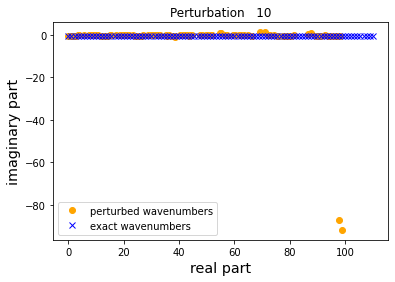

In [22]:
#ep = 1.5

#Getting the perturbed eigenvalues
def complex_quadrature(func, start, end, n, m, ep, pos_of_per, a, pert):                          #function to do complex integration
    def real_func(x, n, m, ep, pos_of_per, a, pert):                                              #gets the real part of the return of the given function
        return np.real(func(x, Bn_func(n, a, ep), Bn_func(m, a, ep), n, m, ep, pos_of_per,a, pert)) 
    def imag_func(x, n, m, ep, pos_of_per, a, pert):                                              #gets the imaginary part of the return of the given function
        return np.imag(func(x, Bn_func(n, a, ep), Bn_func(m, a, ep), n, m, ep, pos_of_per,a, pert))
    real_integral = integrate.quad(real_func, start, end, args=(n, m, ep, pos_of_per, a, pert))             #integrates the real part of the given function
    imag_integral = integrate.quad(imag_func, start, end, args=(n, m, ep, pos_of_per, a, pert))             #integrates the imaginary part of the given function
    return (complex(real_integral[0],imag_integral[0]))                                   #returns the sum of the real part integration and the imaginary part integration

def complex_quadrature_trapz(z, n, m, ep, pos_of_per, a, pert):                        #function to do complex integration
    integrand = []
    for i in range(len(z)):                                            
        integrand.append(en_z_c_pm(z[i], Bn_func(n, a, ep), Bn_func(m, a, ep), n, m, ep, pos_of_per,a, pert))
    real_integral = integrate.trapz(np.real(integrand), z)
    imag_integral = integrate.trapz(np.imag(integrand), z)
    return (complex(real_integral,imag_integral))                                   #returns the sum of the real part integration and the imaginary part integration

def complex_quadrature_trapz_new(z, n, m, ep, a, pert_list):                               #function to do complex integration                                           
    integrand = []
    for i in range(len(z)):
      integrand.append(en_z_c_pm_complex(z[i], Bn_func(n, a, ep), Bn_func(m, a, ep), n, m, ep,a, pert_list))
    real_integral = integrate.trapz(np.real(integrand), z)
    imag_integral = integrate.trapz(np.imag(integrand), z)
    return (complex(real_integral,imag_integral))

def test_again(z, Bn, Bm, n, m, ep, pert, a):
  return Bn*cmath.exp(-1j*n*ep*z) + Bm*cmath.exp(1j*m*a*z) + pert*z**2

def en_z_c_pm(z, Bn, Bm, n, m, ep, pos_of_per,a, pert):
    return perturbation1(z,pos_of_per, pert, a)*en_z_c(z, Bn, n, ep,a)*en_z_c(z, Bm, m, ep,a)                         #can make pert a function of z, to get the dielectric constant at specific positions 

def en_z_c_pm_complex(z, Bn, Bm, n, m, ep,a, pert_list):
  return perturbation3(z,pert_list)*en_z_c(z, Bn, n, ep,a)*en_z_c(z, Bm, m, ep,a)

def rearrange(test_list, test_matrix):
  real_list = []
  imag_list = []

  for i in range(len(test_list)):
    real_list.append(np.real(test_list[i]))
    imag_list.append(np.imag(test_list[i]))
  end_result = np.zeros(len(test_list), dtype = complex)
  end_matrix = np.zeros((len(test_list), len(test_list)), dtype = complex)
  i = 0
  while len(real_list) > 0:
    ind = real_list.index(min(real_list))
    end_result[i] = complex(real_list[ind], imag_list[ind])
    real_list.remove(real_list[ind])
    imag_list.remove(imag_list[ind])  
    end_matrix[:,i] = test_matrix[:,ind]
    test_matrix = np.delete(test_matrix, ind, 1)
    i += 1
  return(end_result, end_matrix)

#"""
N = 500
z = np.linspace(-a,a,N)
v_matrix = np.zeros((2*n+1, 2*n+1), dtype = complex)
for p in range(2*n+1):
  for m in range(2*n+1):
    if m >= p:
      #v_matrix[p,m] = complex_quadrature(en_z_c_pm, -a, a,-n + m,-n + p, ep, pos_of_per, a, pert)
      #v_matrix[p,m] = complex_quadrature_trapz(z,-n + m,-n + p, ep, pos_of_per, a, pert_list)
      v_matrix[p,m] = complex_quadrature_trapz_new(z,-n + m,-n + p, ep, a, pert_list)
    else:
      v_matrix[p,m] = v_matrix[m,p]
#"""

#"""
matrix  = np.zeros((2*n+1, 2*n+1), dtype = complex)

for i in range(2*n+1):                               #gets the matrix given in equation 15 Muljarov 2010
  k_i = wavnum_k(a,-n + i, ep)
  for m in range(2*n+1):
    k_m = wavnum_k(a,-n + m, ep)
    matrix[i,m] = delta(i,m)/k_i + v_matrix[i,m]/(2*np.sqrt(k_i)*np.sqrt(k_m))

eigenval, eigenvec = np.linalg.eig(matrix)
chi_n = []
for i in range(len(eigenval)):
  chi_n.append(1/eigenval[i])
#"""                            

#normalise eigenvectors:

for i in range(len(chi_n)):
  normal = np.dot(eigenvec[:,i],eigenvec[:,i])
  eigenvec[:,i] = eigenvec[:,i]/(np.sqrt(normal))

"""
eigenvec is a matrix containing the eigenvectors of the given matrix, they are ordered such that 
eigenval[i] coresponds to the column given by eigenvec[:,i]
"""

nice = []

chi_n, eigenvec = rearrange(chi_n, eigenvec)

#for i in range(2*n+1):
#  if np.real(chi_n[i])>= -0.5:
#    nice.append(chi_n[i]) 

#"""
plt.plot(np.real(chi_n[n:len(chi_n)-1]), np.imag(chi_n[n:len(chi_n)-1]), 'o', color='orange', label='perturbed wavenumbers')
#plt.plot(np.real(nice), np.imag(nice), 'o', color='orange', label='perturbed wavenumbers')
plt.plot(np.real(kn_list[n:len(chi_n)-1]), np.imag(kn_list[n:len(chi_n)-1]), 'x', color='blue', label='exact wavenumbers')
#plt.plot(np.real(chi_n), np.imag(chi_n), 'o', color='orange', label='perturbed wavenumbers')
#plt.plot(np.real(kn_list), np.imag(kn_list), 'x', color='blue', label='unperturbed wavenumbers')
plt.xlabel('real part', fontsize = 'x-large')
plt.ylabel('imaginary part', fontsize = 'x-large')
plt.title('Perturbation   ' + str(pert))
plt.legend()
plt.show()
#"""

#pert_list = [z+ep for z in pert_list]


"""
pert_plot = []
for i in range(len(x_space)):
  if x_space[i] < -a:
    pert_plot.append(1)
  elif x_space[i] < pos_of_per and x_space[i] > -a:
    pert_plot.append(ep)
  elif x_space[i] < a:
    pert_plot.append(perturbation1(x_space[i], pos_of_per, pert, a) + ep)
  else:
    pert_plot.append(1)
plt.plot(x_space,pert_plot)
plt.show()
#"""


"""
##vectorizing method

for i in range(2*n+1):
  kn_matrix

b_nv_intermediate = eigenstates

b_nv = np.zeros((2*n+1, 2*n+1), dtype = complex)
for i in range(2*n+1):
  b_nv[:,i] = 
z_l = np.linspace(-a*oo,-a,N)

z_c = np.linspace(-a,a,N)

z_r = np.linspace(a,a*oo,N)
#"""

##getting and plotting the perturbed energy states
z = np.linspace(-a,a,N)
pert_en_state_v_c = []
for j in range(2*n+1):
  pert_en_state   = []
  for i in range(len(z)):
    pert_en = 0
    for m in range(2*n+1):
      pert_en += eigenvec[m,j]/np.sqrt(wavnum_k(a,-n+m,ep))*en_z_c(z[i],Bn_func(-n+m,a,ep),-n+m,ep,a)
    pert_en_state.append(pert_en*np.sqrt(chi_n[j]))
  pert_en_state_v_c.append(pert_en_state)

z = np.linspace(-oo*a,-a,N)
pert_en_state_v_l = []
for j in range(2*n+1):
  pert_en_state   = []
  for i in range(len(z)):
    pert_en = 0
    for m in range(2*n+1):
      pert_en += eigenvec[m,j]/np.sqrt(wavnum_k(a,-n+m,ep))*en_z_l(z[i],An_func(-n+m,a,ep),-n+m,ep,a)
    pert_en_state.append(pert_en*np.sqrt(chi_n[j]))
  pert_en_state_v_l.append(pert_en_state)

z = np.linspace(a,oo*a,N)
pert_en_state_v_r = []
for j in range(2*n+1):
  pert_en_state   = []
  for i in range(len(z)):
    pert_en = 0
    for m in range(2*n+1):
      pert_en += eigenvec[m,j]/np.sqrt(wavnum_k(a,-n+m,ep))*en_z_r(z[i],An_func(-n+m,a,ep),-n+m,ep,a)
    pert_en_state.append(pert_en*np.sqrt(chi_n[j]))
  pert_en_state_v_r.append(pert_en_state)


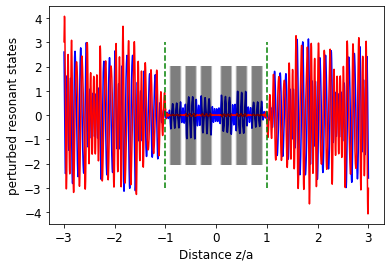

In [23]:
z = np.linspace(-a,a,N)
m = 35

z_c = np.linspace(-a,a,N)
plt.plot(z_c, np.real(pert_en_state_v_c[m]), label='real part of perturbed RS', color = 'blue')
plt.plot(z_c, np.imag(pert_en_state_v_c[m]), 'r', label='imaginary part of perturbed RS')

z_l = np.linspace(-oo*a,-a,N)
plt.plot(z_l, np.real(pert_en_state_v_l[m]), color = 'blue')
plt.plot(z_l, np.imag(pert_en_state_v_l[m]), 'r')

z_r = np.linspace(a,oo*a,N)
plt.plot(z_r, np.real(pert_en_state_v_r[m]), color = 'blue')
plt.plot(z_r, np.imag(pert_en_state_v_r[m]), 'r')
x_space = np.linspace(-a,a,len(pert_list))
for i in range(len(pert_list)):
  X = [x_space[i],x_space[i]]
  Y = [(-pert_list[i] + pert_list[0])/3, (pert_list[i] - pert_list[0])/3]
  plt.plot(X,Y, color = 'black', alpha=0.01)
plt.plot(X,Y, color = 'black', label= 'pertubed area', alpha = 0)
X = [a, a]
Y = [-3,3]
plt.plot(X,Y, 'g--')
X = [-a, -a]
Y = [-3, 3]
plt.plot(X,Y, 'g--')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
plt.xlabel('Distance z/a', fontsize = 'large')
plt.ylabel('perturbed resonant states', fontsize = 'large')

"""
plt.plot(z_l,En_l[0,:], 'r--')
plt.plot(z_c,En_c[0,:], 'r--')
plt.plot(z_r,En_r[0,:], 'r--', label = 'Im $E_n(z)$')

plt.plot(z_l,En_l[1,:], 'b--')
plt.plot(z_c,En_c[1,:], 'b--')
plt.plot(z_r,En_r[1,:], 'b--', label = 'Im $E_n(z)$')
#"""
#plt.legend()
plt.show()



# Transmission of perturbed states

Gets the Green function and the transmission for the perturbed eigenstates


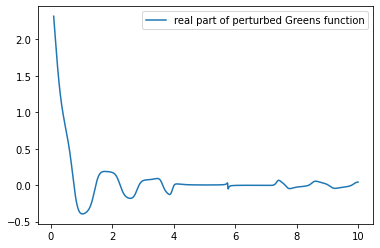

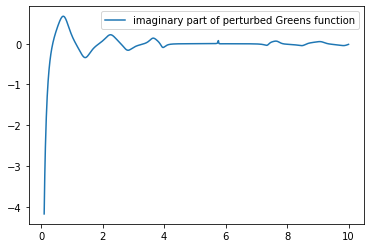

No handles with labels found to put in legend.


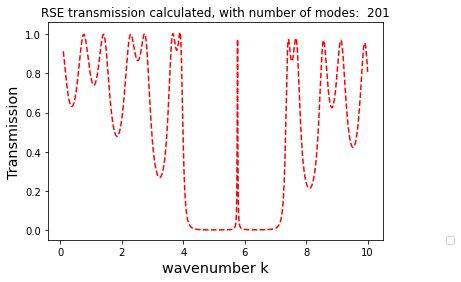

In [27]:
def PF_greens_pert_func(eig,k,n, eigen):                 #gets the transmission of the perturbed eigenfunctions
    pf_sum = 0  
    for i in range(2*n + 1):
      chi     = eigen[i]                                 #gets the wavenumber, which is dependend on n
      pf_sum += (eig[i][-1]*eig[i][0])/(2*k*(k-chi))     #-1 gets the last value of the list 
    return(pf_sum)

k = np.linspace(0.1,10,2*N)
GPF_a_k_per   = []
T_GPF_per     = []

for i in range(len(k)):
  GPF_a_k_per.append(PF_greens_pert_func(pert_en_state_v_c,k[i], n, chi_n))
  
for i in range(len(k)):
  T_GPF_per.append(np.abs(2*k[i]*GPF_a_k_per[i])**2)

#plt.plot(k, np.real(GPF_a_k),'r',  label='real part of Greens function')
plt.plot(k, np.real(GPF_a_k_per), label='real part of perturbed Greens function')
plt.legend()
plt.show()
#plt.plot(k, np.imag(GPF_a_k), label='imaginary part of Greens function')
plt.plot(k, np.imag(GPF_a_k_per), label='imaginary part of perturbed Greens function')
plt.legend()
plt.show()

fig = plt.figure()
ax = plt.subplot(111)


#ax.plot(k, T_GPF)                         #label='unperturbed method'
ax.plot(k, T_GPF_per, 'r--')              #, label='perturbed method'
ax.set_title('RSE transmission calculated, with number of modes:  ' + str(2*n+1))
ax.set_xlabel('wavenumber k', fontsize = 'x-large')
ax.set_ylabel('Transmission', fontsize = 'x-large')
ax.legend(loc='center', bbox_to_anchor=(1.2, 0),
          ncol=1)
plt.show()

In [ ]:
thickness     = np.array([0, 3000, 1000, 0])
dielect_const = np.array([1, 2, 12, 1])